# Spike Trigered Average 
Processing

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from mealib.analysis import sta 
from mealib.utils import check_directory

%matplotlib inline

# Source files to analyze

In [3]:
source_folder = '/home/cesar/exp/MEA-analysis/data/'
stim_file = source_folder+'stim/checkerboard/stim_mini_MR-0227_.hdf5'
sorting_file = source_folder+'sorting/2018-01-25/2018-01-25.result.hdf5'
sync_file = source_folder+'sync/MR-0227/event_list/028.txt'

# Load syncronization times

In [4]:
# Sync
sync_times = np.loadtxt(sync_file).T
start_frame = sync_times[0]
end_frame = sync_times[1]
start_sync = start_frame[0]
end_sync = end_frame[-1]
bins_stim = np.concatenate((start_frame, end_frame[-1:]))

# Load spiketimes from hdf5

In [5]:
# Spikes
with h5py.File(sorting_file) as fspiketimes:
    list_name = [kname for kname in fspiketimes['spiketimes']]
    spiketimes = []
    for key in list_name[:10]:
        timestamp = fspiketimes['/spiketimes/'+key][...]
        ts_checkerboard = sta.get_times_for_sta(timestamp, start_sync, end_sync)
        spiketimes.append((key, ts_checkerboard))

# Run STA with multiprocessing

In [6]:
result = sta.run_multi_sta(stim_file, bins_stim, spiketimes,
                           pre_frame=18, post_frame=0)
print('Results (pool):\n', len(result))

32
69
7883
9167
2034
2112
1122
3455
5989
937
Results (pool):
 10


In [14]:
def plot_sta(sta_array, name=''):
    nframes = sta_array.shape[0]
    ncol = 6
    nrow = nframes//ncol+1 if nframes % ncol else nframes//ncol
    max_c = (np.abs(sta_array)).max()
    fig, ax = plt.subplots(nrow, ncol,
                           sharex=True, sharey=True, figsize=(6, nrow)
                           )
    axf = ax.flatten()
    for kidx, kframe in enumerate(sta_array):
        img = axf[kidx].pcolor(kframe, vmin=-max_c, vmax=max_c, cmap='RdBu_r')
        axf[kidx].set_title('f{}'.format(nframes-kidx-1))
        axf[kidx].set_aspect(1)
    fig.colorbar(img, ax=ax, orientation='vertical', fraction=.01)
    fig.suptitle(name)
    return (fig, ax)


5 6
5 6
5 6
5 6
5 6
5 6
5 6
5 6
5 6
5 6


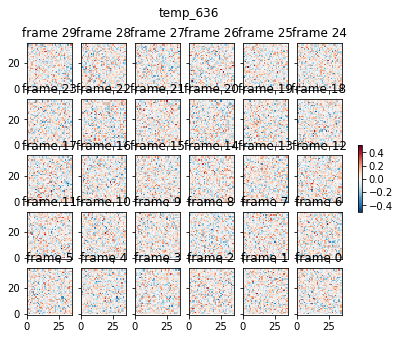

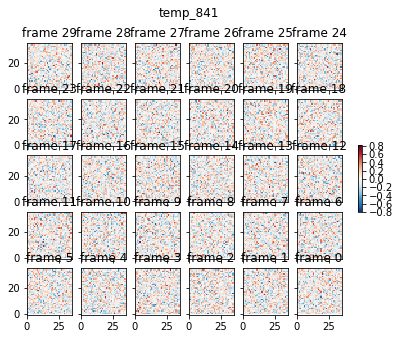

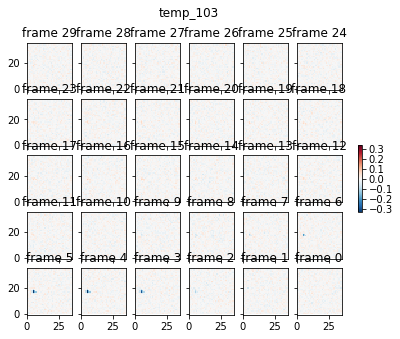

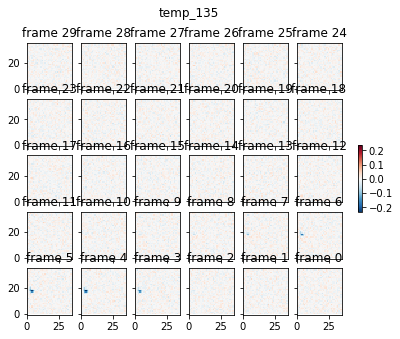

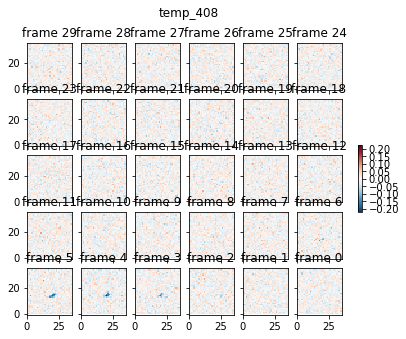

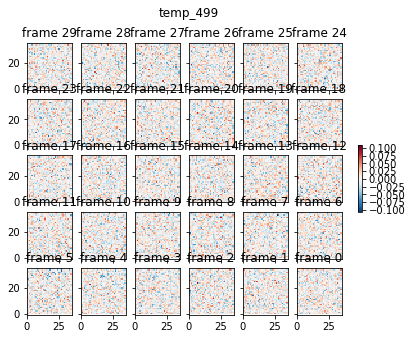

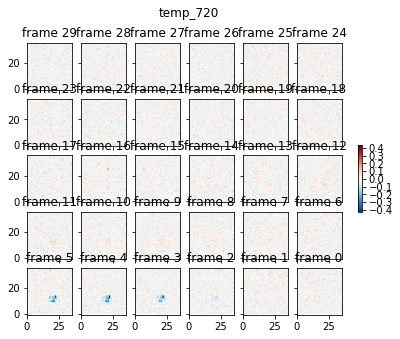

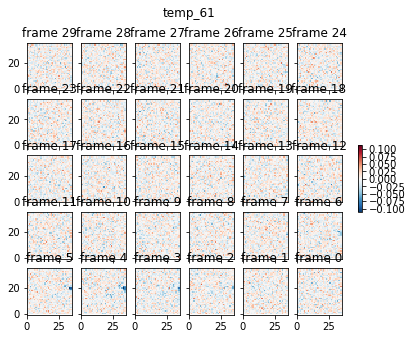

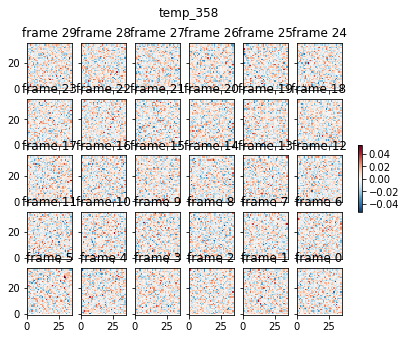

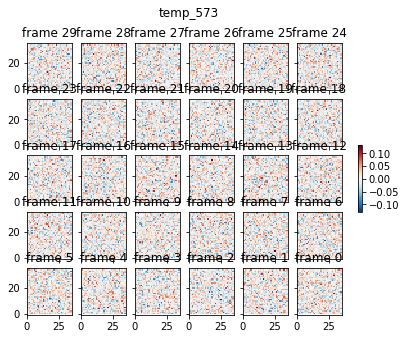

In [15]:
for (kname, ksta) in result:
    fig, ax = plot_sta(ksta, kname)
plt.show()